**Tarea de Clasificación y Regresión**


*Astrid Natalia Castilla Reyes*




In [50]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

#1. Regresión- Boston Housing

In [15]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_r = pd.read_csv("/content/drive/MyDrive/Tareas_de_topicos_datasets/housing.csv", header=None, delimiter=r"\s+", names=column_names)

*Estadísticas generales de los datos*

In [16]:
df_r.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


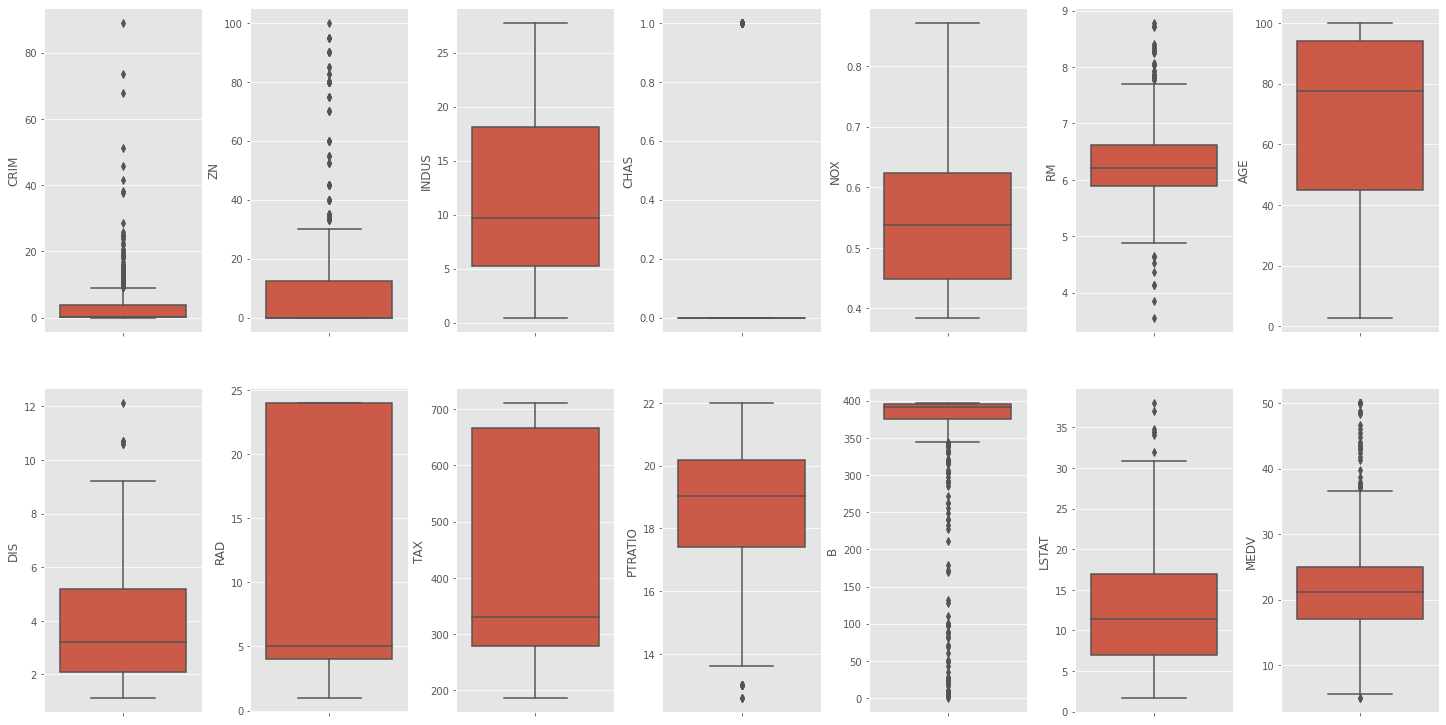

In [23]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_r.items():
    sns.boxplot(y=k, data=df_r, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

*Varias columnas parecen tener outliers*

In [29]:
   for k, v in df_r.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_r)[0]
        print("Porcentaje de atípicos en %s = %.2f%%" % (k, perc))
    

Porcentaje de atípicos en CRIM = 13.04%
Porcentaje de atípicos en ZN = 13.44%
Porcentaje de atípicos en INDUS = 0.00%
Porcentaje de atípicos en CHAS = 100.00%
Porcentaje de atípicos en NOX = 0.00%
Porcentaje de atípicos en RM = 5.93%
Porcentaje de atípicos en AGE = 0.00%
Porcentaje de atípicos en DIS = 0.99%
Porcentaje de atípicos en RAD = 0.00%
Porcentaje de atípicos en TAX = 0.00%
Porcentaje de atípicos en PTRATIO = 2.96%
Porcentaje de atípicos en B = 15.22%
Porcentaje de atípicos en LSTAT = 1.38%
Porcentaje de atípicos en MEDV = 7.91%


In [31]:
df_r = df_r[~(df_r['MEDV'] >= 50.0)]
print(np.shape(df_r))

(490, 14)


**Distribuciones**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

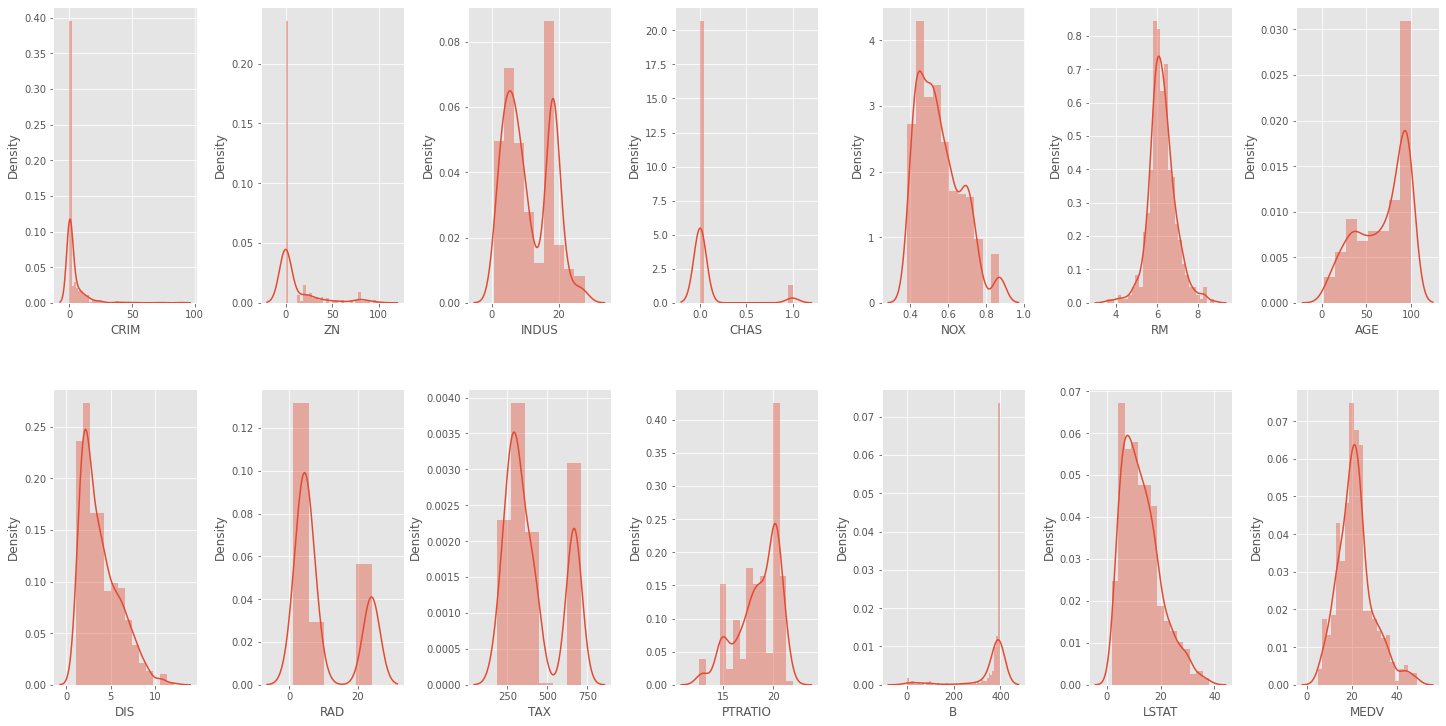

In [34]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_r.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [49]:
column_sels = [ 'MEDV','LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
df_r = df_r[column_sels]
df_r['MEDV'] =  np.log1p(df_r['MEDV'])
for col in df_r.columns:
    if np.abs(df_r[col].skew()) > 0.3:
        df_r[col] = np.log1p(df_r[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Modelo**


In [51]:
X = df_r.drop("MEDV", axis=1).values
y = df_r["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
model_r = Sequential()


model_r.add(Dense(52, activation='relu', input_dim=len(X_train.T)))
model_r.add(Dropout(0.3)) #Para evitar sobreajuste
model_r.add(Dense(16, activation='relu'))
model_r.add(Dropout(0.2))

#Capa de salida
model_r.add(Dense(1))
model_r.compile(optimizer='sgd', loss='mse', metrics=['mae'])
model_r.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                468       
_________________________________________________________________
dropout (Dropout)            (None, 52)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                848       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,333
Trainable params: 1,333
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model_r.fit(X_train, y_train, epochs=100,validation_split=0.2)
y_pred = model_r.predict(X_test)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 1.0661 - mae: 0.9382 - val_loss: 0.2884 - val_mae: 0.4725
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4992 - mae: 0.6011 - val_loss: 0.1505 - val_mae: 0.3311
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3843 - mae: 0.5170 - val_loss: 0.0979 - val_mae: 0.2593
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3177 - mae: 0.4603 - val_loss: 0.0836 - val_mae: 0.2348
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2411 - mae: 0.3980 - val_loss: 0.0719 - val_mae: 0.2136
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2091 - mae: 0.3764 - val_loss: 0.0542 - val_mae: 0.1853
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2052 - mae: 0.3524 - val_loss: 0.0507 - val_mae: 0.1769
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2140 - 

**Función de pérdida**

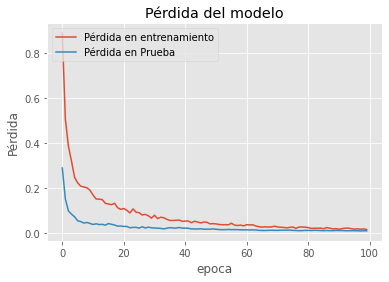

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('epoca')
plt.legend(['Pérdida en entrenamiento', 'Pérdida en Prueba'], loc='upper left')
plt.show()

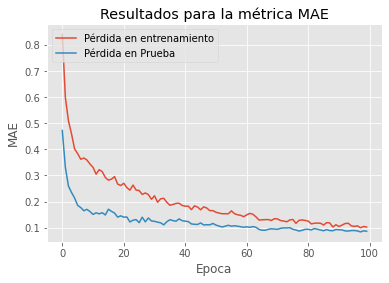

In [60]:
#Resultado para la métrica empleada
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Resultados para la métrica MAE')
plt.ylabel('MAE')
plt.xlabel('Epoca')
plt.legend(['Pérdida en entrenamiento', 'Pérdida en Prueba'], loc='upper left')
plt.show()

In [61]:
mse_nn, mae_nn = model_r.evaluate(X_test, y_test)

print('MSE: ', mse_nn)

4/4 [==============================] - 0s 2ms/step - loss: 0.0077 - mae: 0.0743
MSE:  0.007724747993052006
